This notebook renders the policy assessment cards. It must be run after [systematic_policy_assessment](systematic_policy_assessment.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

#Imports the function to plot render the policy experiments
from render_pol_assess import *

#ask jupyter to display the plots within this notebook
%matplotlib inline

# Data

Let us first read the table produced by  [systematic_policy_assessment](systematic_policy_assessment.ipynb)

In [2]:
#opens the Excel file
xl = pd.ExcelFile("results/derivatives.xlsx")

#add each sheet to a new key in a dictionary
ders=dict()
for s in xl.sheet_names:
    ders[s]=pd.read_excel("results/derivatives.xlsx", index_col="province", sheetname=s)

#concats the dictionary of dataframes into a multi-colmumn dataframe
ders=pd.concat(ders, names=["out","var"],axis=1).T.unstack("out")
ders.head()

province            Abra                 Agusan Del Norte                  \
out                dKtot  dWtot_currency            dKtot  dWtot_currency   
var                                                                         
fap         2.276709e+05  1052089.708077   1611098.429600  5443881.028877   
far         9.193919e+05   761511.025421   4131307.845861  2200408.789618   
nat_buyout -5.820766e-07  -446649.700235         0.000002 -3780004.900084   
pi         -2.124495e+05  -368933.100200  -1767215.686801 -2614178.300658   
pov_head    5.528015e+04   283270.927011   1325373.414119  4347793.326336   

province    Agusan Del Sur                            Aklan                   \
out                  dKtot  dWtot_currency            dKtot   dWtot_currency   
var                                                                            
fap         1995253.577513  7167346.524198   4894521.883042  17036194.568531   
far         2930588.077283  2181892.740172  14618905.100807  17542379.832535   
nat_buyout        0.000000 -1663321.618009         0.000000         0.000000   
pi          -542593.069321 -1148565.655774         0.000000         0.000000   
pov_head     405790.353140  1394349.385307         0.000000         0.000000   

province              Albay                       ...              Tawi-Tawi  \
out                   dKtot  dWtot_currency       ...                  dKtot   
var                                               ...                          
fap         16066028.839387  54168627.97383       ...         4087594.814025   
far         31889806.834252  18435909.06778       ...         9908812.796986   
nat_buyout         0.000000         0.00000       ...               0.000000   
pi                 0.000000         0.00000       ...               0.000000   
pov_head           0.000000         0.00000       ...               0.000000   

province                            Zambales                   \
out          dWtot_currency            dKtot   dWtot_currency   
var                                                             
fap         16035104.425007   2954302.191241  10862702.753742   
far         10830195.247801  26248596.253658  15591191.763418   
nat_buyout         0.000000         0.000000         0.000000   
pi                 0.000000         0.000000         0.000000   
pov_head           0.000000         0.000000         0.000000   

province   Zamboanga Del Norte                  Zamboanga Del Sur  \
out                      dKtot   dWtot_currency             dKtot   
var                                                                 
fap            15603265.699440  56054845.664972    2866127.559455   
far            15099874.444976  12711371.295657    8709492.839294   
nat_buyout            0.000000         0.000000          0.000000   
pi                    0.000000         0.000000    -439839.512619   
pov_head              0.000000         0.000000     328873.412437   

province                    Zamboanga Sibugay                   
out          dWtot_currency             dKtot   dWtot_currency  
var                                                             
fap         10378700.246970    9012503.817239  31226672.259974  
far          5408545.760415   11864424.930739   9100526.513554  
nat_buyout  -1040308.228281          0.000000         0.000000  
pi           -662143.772929          0.000000         0.000000  
pov_head     1166681.006323          0.000000         0.000000  

[5 rows x 148 columns]

# Parameters

In [3]:
##POLICY DESCRIPTION
policy_info= pd.read_csv("inputs/policy_description.csv",index_col=0)

#Policy Labels (y axis)
policy_labels = policy_info.descriptor.copy() #we make a copy so we can modify it later
policy_labels.head()

#Size of the policy experiment
size = policy_info.increment
size.head()

#formats policy description so as to show the particular amount of change
for k in policy_labels.index:
#     try:
        policy_labels[k]=policy_labels[k].format(dh=size[k])
#     except(TypeError):
#         pass

policy_labels.head()    

key
fap                Exposure of poor households (-1%)
far             Exposure of nonpoor households (-1%)
rel_gdp_pp      Average income in the province (+1%)
rho                                    Discount rate
income_elast                   Elasticity of utility
Name: descriptor, dtype: object

In [4]:
#unit for welfare and asset loses changes
unit = dict(multiplier = 1e-3, string = "million pesos per year")

In [5]:
colors = pd.read_csv("inputs/colors_pol_assess.csv", index_col=0)
colors

,color,edgecolor,alpha
dWtot_currency,#a6cee3,#1f78b4,1
dKtot,#cccccc,#969696,1


# actual drawing

Currently working on:  Bulacan


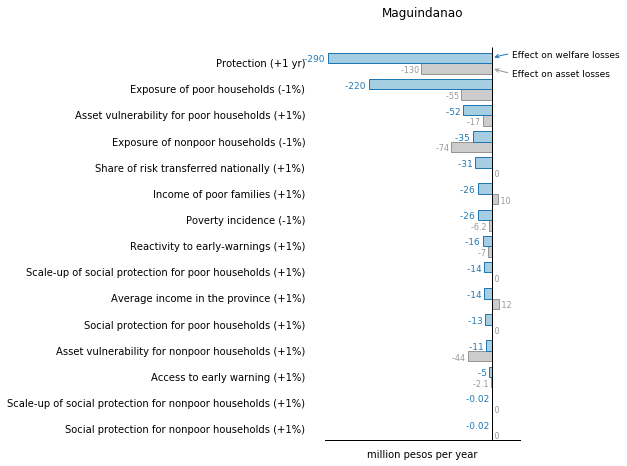

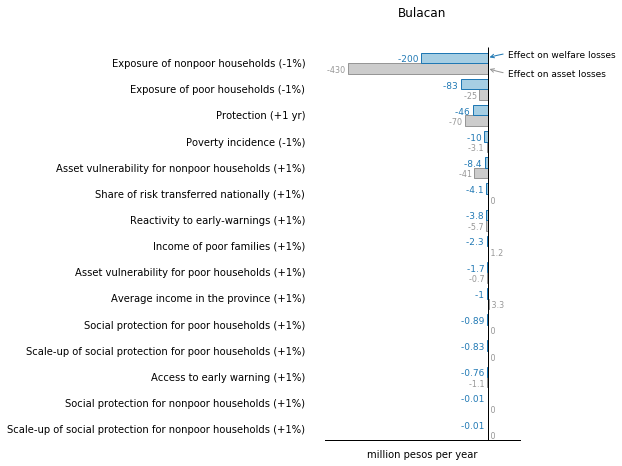

In [6]:
render_pol_cards(ders,colors,policy_labels,unit,size,["Maguindanao", "Bulacan"])
# render_pol_cards(ders,colors,policy_labels,unit,size)

### Merge to single pdf

Merges the individual province cards into one big multi page pdf. Requires ghostscript.

In [7]:
province_list=glob.glob("cards/*.pdf")
merge_cardfiles(province_list,"all_cards.pdf")

Merging cards....
Merging cards done


Converts the pdf files to png images. Requires Imagemagick.

In [8]:
convert_pdf_to_png("cards/")

Converting cards....
conversion to png done
